In [81]:
#Import library

import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


In [82]:
#load data
df = pd.read_csv("data/export.csv").rename(columns={'date':'year','Indonesia Count_Person':'population'})

#remove na values from data
df.dropna(inplace=True)
df.tail()

,year,population
56,2016,261556386
57,2017,264650969
58,2018,267670549
59,2019,270625567
60,2020,273523621


<Axes: xlabel='year'>

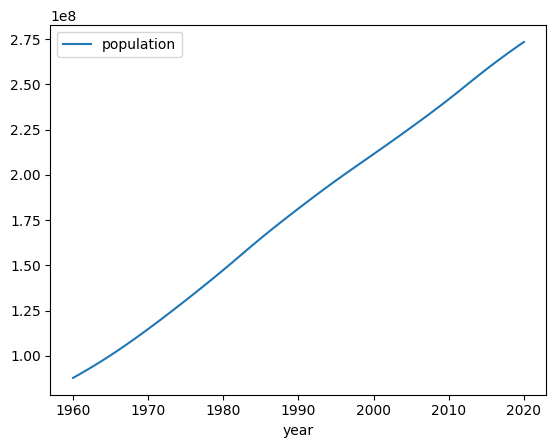

In [83]:
# plot data
df.plot(x='year')

The data obtained is very linear. For simple applications, it is felt that no further processing is needed

In [84]:
# set_feature and predict column
X = df[['year']]
y = df['population']

In [85]:
#build model with 20% data_test using linear regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)
#score

r2=r2_score(y_test, y_pred)
print(f'r2_score = {r2}')

r2_score = 0.9995618571829608


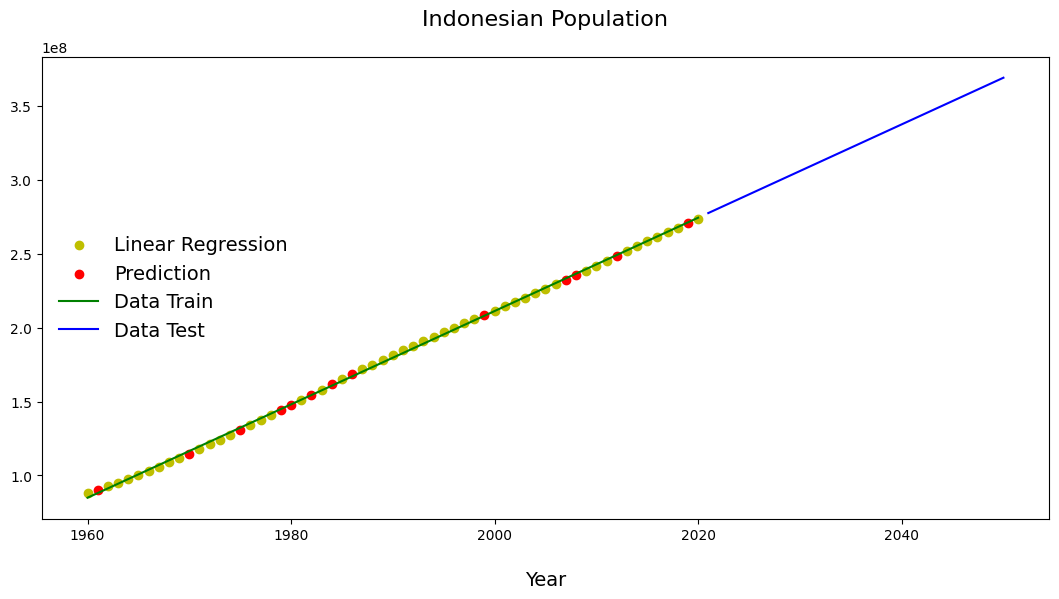

In [87]:
#visualize
fig = plt.figure(figsize=(13,6))
plt.scatter(X_train, y_train,color='y')
plt.scatter(X_test, y_test,color='r')
plt.plot(np.linspace(1960,2020,90).reshape(-1,1), model.predict(np.linspace(1960,2020,90).reshape(-1,1)),'g')
plt.plot(np.linspace(2021,2050,30).reshape(-1,1), model.predict(np.linspace(2021,2050,30).reshape(-1,1)),'b')
plt.title('Indonesian Population\n',fontsize=16,loc="center")
plt.legend(['Linear Regression','Prediction','Data Train', 'Data Test'],fontsize=14,loc="center left",markerscale=1,frameon=False)
plt.xlabel('\nYear',fontsize=14)
plt.show()

In [88]:
# saving the model 
pickle_out = open("model/indonesian_population_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [89]:
def pred(year):
    prediction = int(model.predict([[year]]))
    return prediction

In [91]:
pred(2025)

290222460